# Airbnb Seattle Data Analysis

## Introduction
This notebook provides exploratory data analysis (EDA) and insights into Seattle's Airbnb data.
The goal of this project is to uncover patterns and trends in Airbnb listings, such as factors influencing prices, seasonal availability, and the impact of customer reviews.
By analyzing these datasets, stakeholders such as hosts, guests, and policymakers can make informed decisions.

## Key Objectives:
- Understand what factors contribute to listing prices.
- Explore seasonal trends and their influence on availability.
- Evaluate how customer reviews and ratings impact a listing's success.

The data for this analysis includes information about listings, calendar availability, and customer reviews, offering a comprehensive view of the Airbnb market in Seattle.


## Step 1: Inspect, Clean, and Save the Dataset

## Installation
#To install the required dependencies, run:
```bash

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the datasets

In [3]:
listings_path = 'data/listings.csv'
calendar_path = 'data/calendar.csv'
reviews_path = 'data/reviews.csv'

### Load the data

In [4]:
listings = pd.read_csv(listings_path)
calendar = pd.read_csv(calendar_path)
reviews = pd.read_csv(reviews_path)

### Functions for Data Cleaning and Data Display

In [5]:
def clean_currency_column(dataframe, columns):
    """
    Clean currency columns by removing symbols and converting to numeric.
    
    Args:
        dataframe (pd.DataFrame): Dataframe containing the columns to clean.
        columns (list): List of column names to clean.
        
    Returns:
        pd.DataFrame: Dataframe with cleaned columns.
    """
    for col in columns:
        dataframe[col] = dataframe[col].replace('[\$,]', '', regex=True).astype(float)
    return dataframe

def handle_missing_values(dataframe, method='drop', subset=None):
    """
    Handle missing values in a dataframe.
    
    Args:
        dataframe (pd.DataFrame): Dataframe to handle missing values in.
        method (str): 'drop' or 'fill' method for missing values.
        subset (list): Subset of columns to apply the method.
        
    Returns:
        pd.DataFrame: Dataframe with missing values handled.
    """
    if method == 'drop':
        dataframe.dropna(subset=subset, inplace=True)
    elif method == 'fill':
        dataframe.fillna(0, inplace=True)
    return dataframe

### Inspect Listings Dataset

In [6]:
print("Listings Dataset Info:")
listings.info()
print("\nListings Dataset Sample:")
print(listings.head())

Listings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-nul

### Clean Listings Dataset

### Handling Missing Values: Dropping Rows
Rows with missing values in critical columns (`price`, `bedrooms`, `bathrooms`, etc.) were dropped using `dropna()`:
- These columns directly affect the insights (e.g., price trends, room type analysis).
- Imputing values (e.g., filling with mean or median) might introduce bias or distort trends.
- Since these columns are not expected to have many missing values, dropping rows was appropriate.

In [7]:
listings = clean_currency_column(listings, ['price', 'cleaning_fee', 'security_deposit'])
listings = handle_missing_values(listings, method='drop', subset=['price', 'bedrooms', 'bathrooms', 'accommodates'])

### Save cleaned listings dataset

In [8]:
listings.to_csv('data/listings_cleaned.csv', index=False)
print("Cleaned listings dataset saved.")

Cleaned listings dataset saved.


### Inspect Calendar Dataset

In [9]:
print("\nCalendar Dataset Info:")
calendar.info()
print("\nCalendar Dataset Sample:")
print(calendar.head())


Calendar Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB

Calendar Dataset Sample:
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


### Clean Calendar Dataset

In [10]:
calendar = clean_currency_column(calendar, ['price'])
calendar['available'] = calendar['available'].map({'t': True, 'f': False})

### Save cleaned calendar dataset

In [11]:
calendar.to_csv('data/calendar_cleaned.csv', index=False)
print("Cleaned calendar dataset saved.")

Cleaned calendar dataset saved.


### Inspect Reviews Dataset

In [12]:
print("\nReviews Dataset Info:")
reviews.info()
print("\nReviews Dataset Sample:")
print(reviews.head())


Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB

Reviews Dataset Sample:
   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments 

### Clean Reviews Dataset

### Handling Missing Values: Filling Missing Data
For columns like `review_scores_rating`, missing values were filled with the median. This approach was chosen because:
- It avoids losing data while maintaining consistency in the dataset.
- Median imputation was selected to minimize the impact of extreme outliers.

In [13]:
listings = handle_missing_values(listings, method='fill', subset=['review_scores_rating'])

### Save cleaned reviews dataset

In [14]:
reviews.to_csv('data/reviews_cleaned.csv', index=False)
print("Cleaned reviews dataset saved.")

Cleaned reviews dataset saved.


### Missing Values Overview

- **`listings.csv`**:
  - Missing values were found in columns such as `price`, `bedrooms`, `bathrooms`.
  - Rows with missing values in critical columns (`price`, `bedrooms`, or `bathrooms`) were dropped because these columns are essential for analysis and directly impact results.
  

- **`reviews.csv`**:
  - The `review_scores_rating` column had missing values.
  - Missing values were filled using the **median** because:
    - It avoids dropping rows unnecessarily, retaining more data for analysis.
    - The median is robust against outliers and ensures consistent scores for the analysis.



## Step 2: Exploratory Data Analysis (EDA)

### Load cleaned datasets

In [15]:
listings = pd.read_csv('data/listings_cleaned.csv')
calendar = pd.read_csv('data/calendar_cleaned.csv')
reviews = pd.read_csv('data/reviews_cleaned.csv')

### Listings Dataset EDA

In [16]:
print("Listings Dataset Summary:")
listings.describe()

print("\nListings Dataset Column Types:")
listings.dtypes

Listings Dataset Summary:

Listings Dataset Column Types:


id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

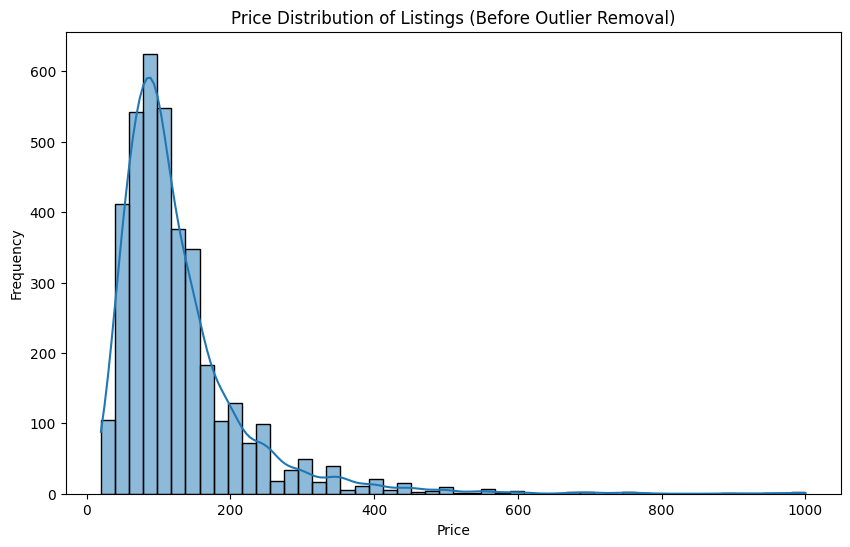

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution of Listings (Before Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Remove Outliers for Better Insights

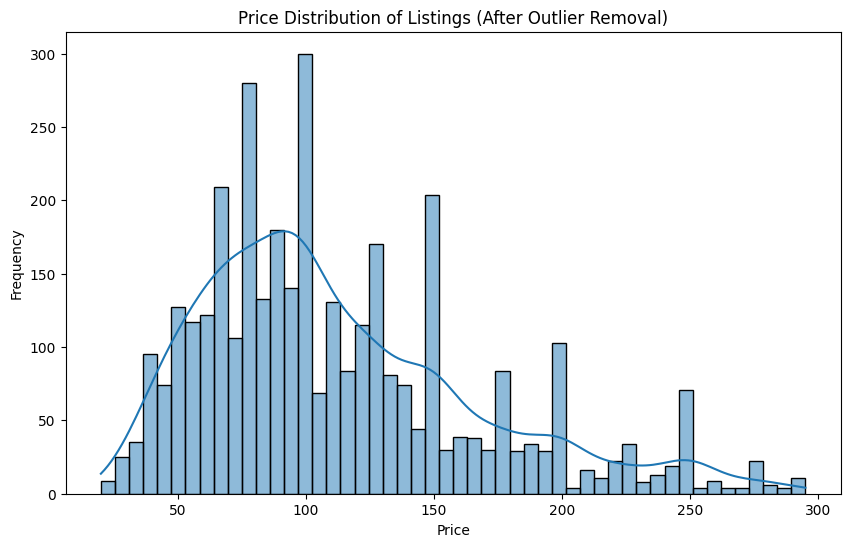

In [18]:
listings = listings[listings['price'] < listings['price'].quantile(0.95)]

plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution of Listings (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Room Type Distribution

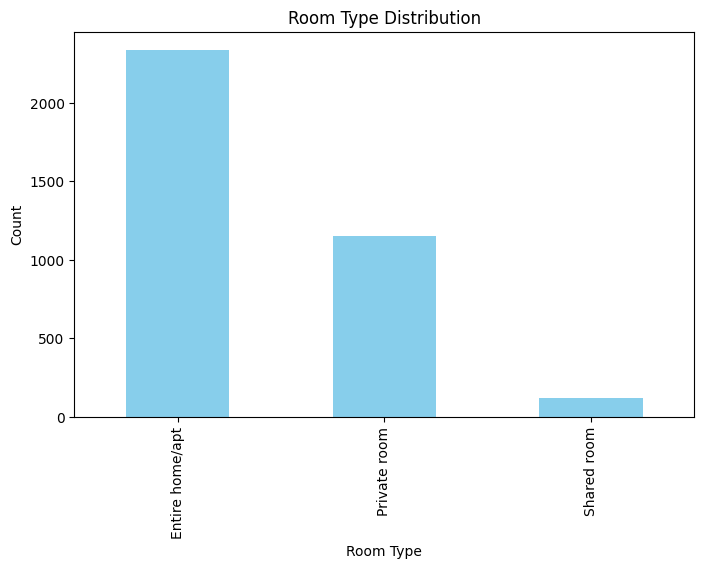

In [19]:
plt.figure(figsize=(8, 5))
room_type_counts = listings['room_type'].value_counts()
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

### Calendar Dataset EDA

In [20]:
print("Calendar Dataset Summary:")
calendar.describe()

Calendar Dataset Summary:


,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


### Availability Over Time

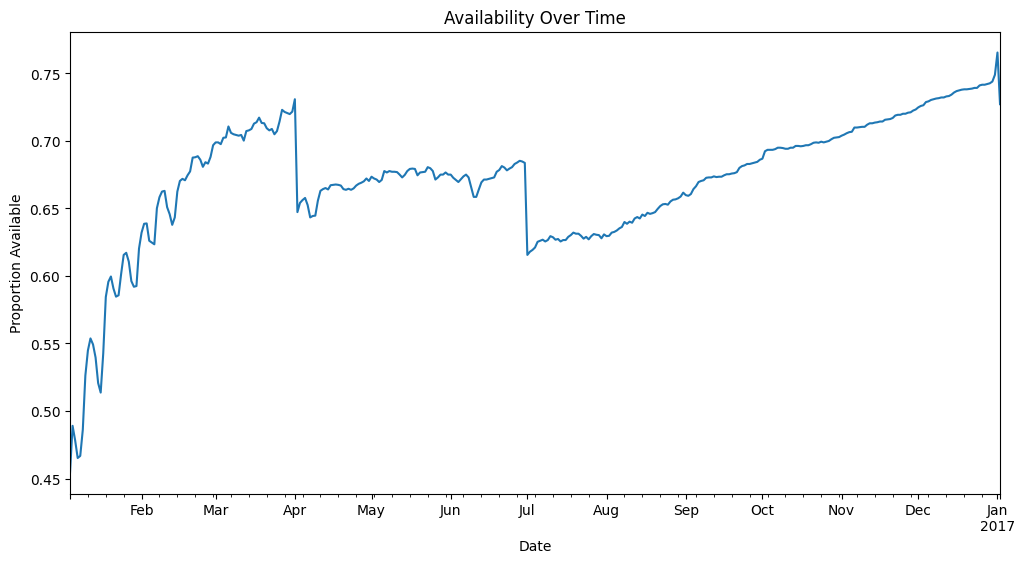

In [21]:
calendar['date'] = pd.to_datetime(calendar['date'])
availability_over_time = calendar.groupby('date')['available'].mean()
plt.figure(figsize=(12, 6))
availability_over_time.plot()
plt.title('Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion Available')
plt.show()

### Reviews Dataset EDA

In [22]:
print("Reviews Dataset Summary:")
reviews.describe()

Reviews Dataset Summary:


,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


### Number of Reviews Over Time

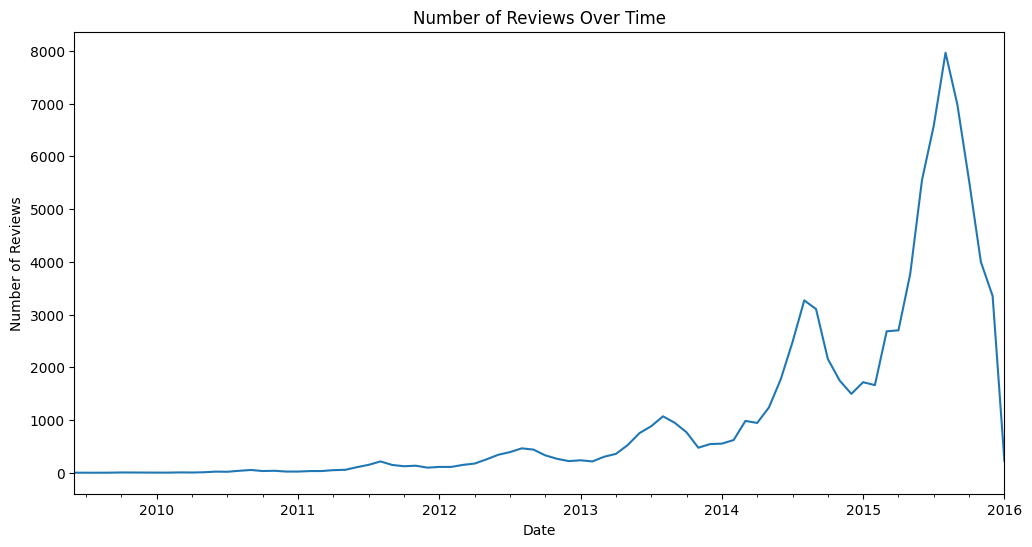

Exploratory Data Analysis Completed.


In [23]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews_per_month = reviews.groupby(reviews['date'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
reviews_per_month.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

print("Exploratory Data Analysis Completed.")

## Step 3: Define Key Questions and Prepare Analysis

### Question 1: What factors influence the price of a listing?

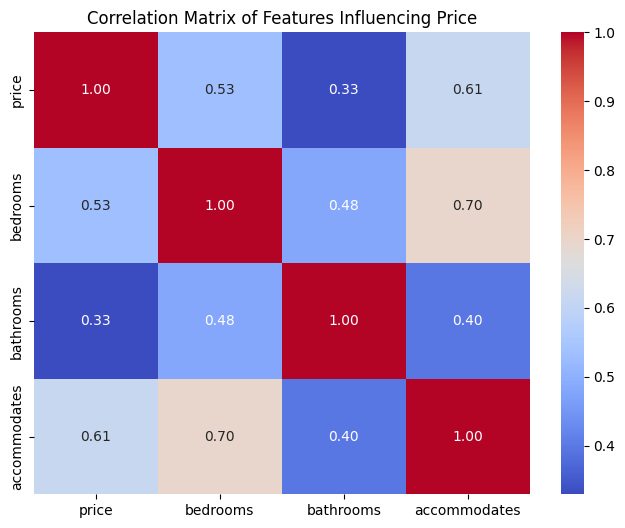

In [24]:
correlation_features = ['price', 'bedrooms', 'bathrooms', 'accommodates']
correlation_matrix = listings[correlation_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features Influencing Price')
plt.show()

### Question 2: Are there seasonal trends in Airbnb bookings?

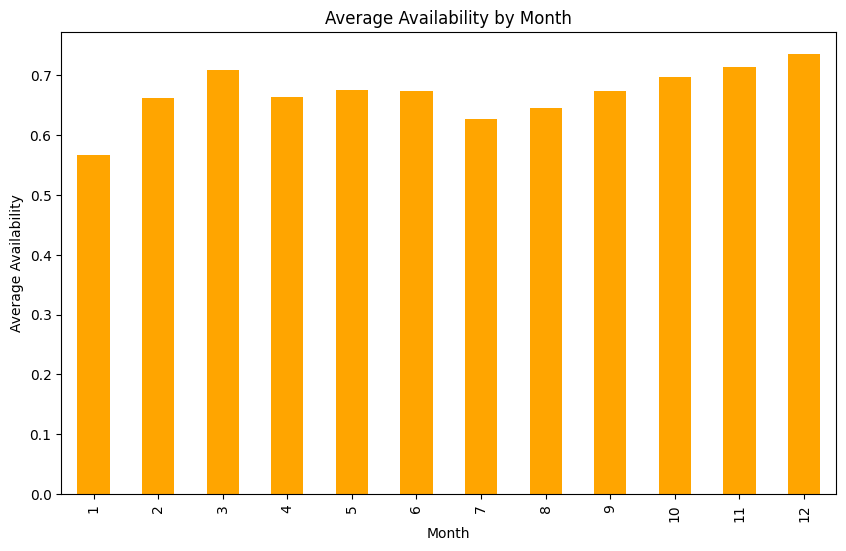

In [25]:
calendar['month'] = calendar['date'].dt.month
monthly_availability = calendar.groupby('month')['available'].mean()

plt.figure(figsize=(10, 6))
monthly_availability.plot(kind='bar', color='orange')
plt.title('Average Availability by Month')
plt.xlabel('Month')
plt.ylabel('Average Availability')
plt.show()

### Question 3: How do customer reviews impact a listing's success?

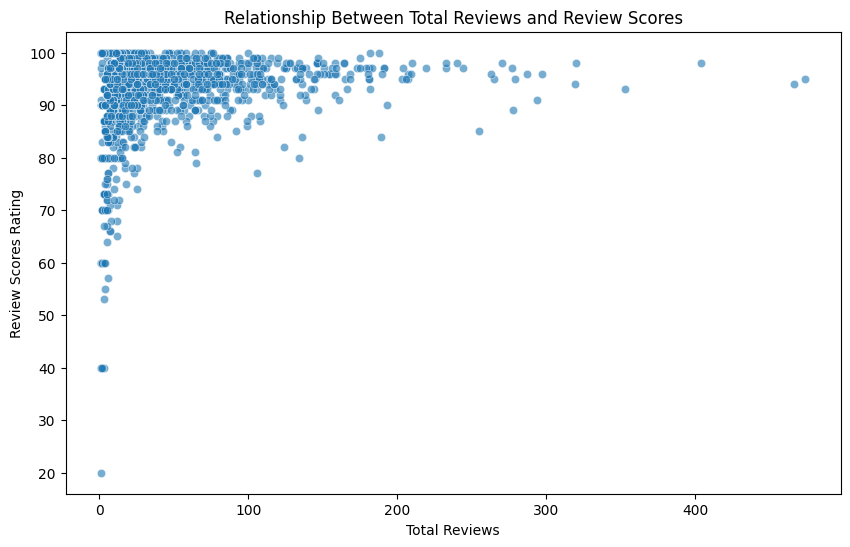

Key questions analyzed and visualized.


In [26]:
reviews_per_listing = reviews.groupby('listing_id').size()
listings['total_reviews'] = listings['id'].map(reviews_per_listing)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=listings, x='total_reviews', y='review_scores_rating', alpha=0.6)
plt.title('Relationship Between Total Reviews and Review Scores')
plt.xlabel('Total Reviews')
plt.ylabel('Review Scores Rating')
plt.show()

print("Key questions analyzed and visualized.")

## Step 4: Evaluate Results and Generate Insights

### Evaluation for Question 1

In [27]:
print("\nEvaluation for Question 1:")
print("Correlation Matrix:")
correlation_matrix


Evaluation for Question 1:
Correlation Matrix:


,price,bedrooms,bathrooms,accommodates
price,1.000000,0.533444,0.329500,0.612542
bedrooms,0.533444,1.000000,0.478865,0.695564
bathrooms,0.329500,0.478865,1.000000,0.395304
accommodates,0.612542,0.695564,0.395304,1.000000


### Evaluation for Question 2

In [28]:
print("\nEvaluation for Question 2:")
seasonal_trends = monthly_availability.describe()
print("Monthly Availability Summary:")
seasonal_trends


Evaluation for Question 2:
Monthly Availability Summary:


count    12.000000
mean      0.670405
std       0.044442
min       0.566937
25%       0.657919
50%       0.674393
75%       0.699682
max       0.735573
Name: available, dtype: float64

### Evaluation for Question 3

In [29]:
print("\nEvaluation for Question 3:")
review_stats = listings[['total_reviews', 'review_scores_rating']].describe()
print("Review Statistics:")
review_stats


Evaluation for Question 3:
Review Statistics:


,total_reviews,review_scores_rating
count,3023.000000,3005.000000
mean,27.174661,94.492180
std,40.381379,6.605415
min,1.000000,20.000000
25%,4.000000,93.000000
50%,13.000000,96.000000
75%,32.000000,99.000000
max,474.000000,100.000000


In [30]:
insights = """
Key Insights:
1. Price is moderately correlated with the number of bedrooms and accommodates capacity, indicating larger properties tend to be more expensive.
2. Seasonal trends show lower availability in peak months, suggesting higher demand.
3. Listings with more reviews generally maintain higher review scores, but additional factors such as amenities and neighborhood also play a role.
4. Hosts can focus on improving property features like amenities to increase listing appeal.
"""
print(insights)



Key Insights:
1. Price is moderately correlated with the number of bedrooms and accommodates capacity, indicating larger properties tend to be more expensive.
2. Seasonal trends show lower availability in peak months, suggesting higher demand.
3. Listings with more reviews generally maintain higher review scores, but additional factors such as amenities and neighborhood also play a role.
4. Hosts can focus on improving property features like amenities to increase listing appeal.

